# Stone's Data Science Test

## Dev: Mateus Broilo
mateus.brilo90@gmail.com

* Objectives: Load Datasets and perform 

 # Summary

* Initials
    * Loading Libraries and Packages
    * Configurations
    * Global Variables
* Loading data
    * Checking and Removing Duplicates
* Creating resources
    * Concat Dia and Hora resources and check its length
    * Creating day_of_name, day_of_month and pure_time
* Exploratory Data Analysis
    * Simple Hypotheses
    * Univariate Analysis
        * Resource: Valor
        * Resource: pure_time
        * Resource: day_of_month
        * Resource: day_of_week
        * Target Analysis: CBK
    * Bivariate Analysis
        * Valor VS target
        * day_name VS target
        * day_of_month VS target
        * pure_time VS target
    * Hypothesis Conclusion
    * Multivariate Analysis
        * Valor and pure_time per day_name VS target
        * Valor and pure_time per day_of_month VS target
* Análise Comportamental
    * Recorrência de transação diária por Cartão
    * Recorrência de transação diária de mesmo Valor por Cartão
    * Merge
    * Tempo entre transações do mesmo Cartão num mesmo dia
    * Ticket Médio
        * Convertido
        * Não convertido
    * Perguntas
        * Qual é o comportamento transacional do cliente (o que caracteriza as transações deste cliente)?
        * Qual é o perfil das transações que retornaram chargeback?
    


# Initials
* Loading Libraries and Packages
* Configuration
* Global Variables

## Loading Libraries and Packages 

In [1]:
# general
import warnings
import time
import gc

#data
import pandas as pd
import numpy as np
from datetime import (datetime, date)

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls -l ../data/

total 1652
-rw-rw-r-- 1 broilo broilo  514550 mai 20 16:56 20220520_corrected_sheet1.csv
-rw-rw-r-- 1 broilo broilo 1174471 mai 23 11:26 20220522_data_prep.csv


## Configurations

In [3]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 12, 
    'axes.titlesize': 24, 'xtick.labelsize': 14, 'ytick.labelsize': 12}

sns.set(rc=rc)
sns.set_palette("tab10")
sns.set_style("darkgrid")#sns.set_style("whitegrid")

## Global Variables

In [4]:
PATH_DATA = "../data/"
DATA = "20220520_corrected_sheet1.csv"
DATE = time.strftime("%Y%m%d")

# Loading Datasets
* Checking and Removing Duplicates

In [5]:
df = pd.read_csv(PATH_DATA + DATA, sep=',')
print(df.shape)
df

(11128, 5)


,Dia,Hora,Valor,Cartão,CBK
0,2015-05-01,00:01:54,36.54,536518******2108,Não
1,2015-05-01,00:03:46,36.54,536518******2108,Não
2,2015-05-01,00:08:50,69.00,453211******1239,Não
3,2015-05-01,00:27:00,193.43,548827******1705,Não
4,2015-05-01,01:32:46,132.00,531681******9778,Não
...,...,...,...,...,...
11123,2015-05-30,23:07:01,53.00,514868******7409,Não
11124,2015-05-30,23:08:47,15.00,439354******5281,Não
11125,2015-05-30,23:15:24,20.00,549167******1648,Não
11126,2015-05-30,23:17:41,70.00,518759******8384,Não


## Checking and Removing Duplicates

In [6]:
df[df.duplicated() == True]

,Dia,Hora,Valor,Cartão,CBK
6104,2015-05-15,23:00:20,264.00,515894******6461,Sim
11004,2015-05-30,14:32:17,15.00,514945******7580,Não
11005,2015-05-30,14:32:37,96.42,498408******2729,Não
11006,2015-05-30,14:33:03,35.00,441524******8556,Não
11007,2015-05-30,14:35:14,99.00,546451******1223,Não
...,...,...,...,...,...
11123,2015-05-30,23:07:01,53.00,514868******7409,Não
11124,2015-05-30,23:08:47,15.00,439354******5281,Não
11125,2015-05-30,23:15:24,20.00,549167******1648,Não
11126,2015-05-30,23:17:41,70.00,518759******8384,Não


In [7]:
#df = df.drop_duplicates(keep='first').reset_index(drop=True).copy()

In [8]:
#df

# Creating resources
* Concat Dia and Hora resources anc check its length
* Creating day_of_name, day_of_month and pure_time

## Concat Dia and Hora resources and check its length
* As and example, the length must correspond: 2015-05-01 00:01:54
* Any entry with length greater or less than 2015-05-01 00:01:54 must be excluded or properly corrected

In [9]:
df['Data'] = df.Dia.astype(str) + ' ' + df.Hora.astype(str)

uniqueDataLen = []
for i in range(len(df.Data)):
    uniqueDataLen.append(len(df.Data[i]))
uniqueDataLen = list(set(uniqueDataLen))
uniqueDataLen

[19, 30]

In [10]:
idx = []
for i in range(len(df.Data)):
    if len(df.Data[i]) > 19 or len(df.Data[i]) < 19:
        idx.append(df[df.Data == df.Data[i]].index.values[0])
    else:
        None
print(f"Problem lines: {idx}")
display(df.iloc[idx])
df.drop(index=idx, axis=0, inplace=True)

Problem lines: [7779]


,Dia,Hora,Valor,Cartão,CBK,Data
7779,2015-05-22,1899-12-30 00:00:00,23.0,498453******6960,Não,2015-05-22 1899-12-30 00:00:00


## Creating day_of_name, day_of_month and pure_time

In [11]:
col1, col2 = 'Dia', 'Hora'

# day_of_week
df['day_of_week'] = list(pd.to_datetime(df[col1], format='%Y-%m-%d').dt.dayofweek)
df['day_name'] = list(pd.to_datetime(df[col1], format='%Y-%m-%d').dt.day_name())#.dayofweek)

# day_of_month
df[[col1+'_Ano', col1+'_Mês', col1+'_Dia']] = df[col1].str.split("-", expand=True)
df.rename(columns={col1+'_Dia':'day_of_month'}, inplace=True)
df['day_of_month'] = df['day_of_month'].astype(int)

# pure_time
df[[col2+'_HH', col2+'_MIN', col2+'_SEC']] = df[col2].str.split(":", expand=True)
df['pure_time'] = df[col2+'_HH'].astype(int) + (df[col2+'_MIN'].astype(int) / 60) + (df[col2+'_SEC'].astype(float) / 3600)

del df[col1+'_Ano'], df[col1+'_Mês'], df[col2+'_HH'], df[col2+'_MIN'], df[col2+'_SEC']
df

,Dia,Hora,Valor,Cartão,CBK,Data,day_of_week,day_name,day_of_month,pure_time
0,2015-05-01,00:01:54,36.54,536518******2108,Não,2015-05-01 00:01:54,4,Friday,1,0.031667
1,2015-05-01,00:03:46,36.54,536518******2108,Não,2015-05-01 00:03:46,4,Friday,1,0.062778
2,2015-05-01,00:08:50,69.00,453211******1239,Não,2015-05-01 00:08:50,4,Friday,1,0.147222
3,2015-05-01,00:27:00,193.43,548827******1705,Não,2015-05-01 00:27:00,4,Friday,1,0.450000
4,2015-05-01,01:32:46,132.00,531681******9778,Não,2015-05-01 01:32:46,4,Friday,1,1.546111
...,...,...,...,...,...,...,...,...,...,...
11123,2015-05-30,23:07:01,53.00,514868******7409,Não,2015-05-30 23:07:01,5,Saturday,30,23.116944
11124,2015-05-30,23:08:47,15.00,439354******5281,Não,2015-05-30 23:08:47,5,Saturday,30,23.146389
11125,2015-05-30,23:15:24,20.00,549167******1648,Não,2015-05-30 23:15:24,5,Saturday,30,23.256667
11126,2015-05-30,23:17:41,70.00,518759******8384,Não,2015-05-30 23:17:41,5,Saturday,30,23.294722


In [12]:
## Important resources

In [13]:
#list(df)

In [14]:
important = [
    'Cartão',
    'Dia',
    'Hora',
    'Valor',
    #'Data',
    'day_of_week',
    'day_name',
    'day_of_month',
    'pure_time',
    'CBK'
]
df = df[important].copy()
df

,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK
0,536518******2108,2015-05-01,00:01:54,36.54,4,Friday,1,0.031667,Não
1,536518******2108,2015-05-01,00:03:46,36.54,4,Friday,1,0.062778,Não
2,453211******1239,2015-05-01,00:08:50,69.00,4,Friday,1,0.147222,Não
3,548827******1705,2015-05-01,00:27:00,193.43,4,Friday,1,0.450000,Não
4,531681******9778,2015-05-01,01:32:46,132.00,4,Friday,1,1.546111,Não
...,...,...,...,...,...,...,...,...,...
11123,514868******7409,2015-05-30,23:07:01,53.00,5,Saturday,30,23.116944,Não
11124,439354******5281,2015-05-30,23:08:47,15.00,5,Saturday,30,23.146389,Não
11125,549167******1648,2015-05-30,23:15:24,20.00,5,Saturday,30,23.256667,Não
11126,518759******8384,2015-05-30,23:17:41,70.00,5,Saturday,30,23.294722,Não


# Exploratory Data Analysis
* Hypotheses
* Univariate Analysis
    * Resource: Valor
    * Resource: pure_time
    * Resource: day_of_month
    * Resource: day_of_week
    * Target Analysis: CBK
* Bivariate Analysis
    * Valor VS target
    * day_name VS target
    * day_of_month VS target
    * pure_time VS target
* Multivariate Analysis
    * Valor and pure_time per day_name VS target
    * Valor and pure_time per day_of_month VS target

## Hypothesis

<br>
<table>
	<thead>
        <tr>
			<th colspan = "3" style="text-align:center;">Levantamento de Hipóteses</th>
		</tr>
		<tr>
			<th>Group</th>
			<th>#</th>
			<th>Hypothesis</th>
		</tr>
	</thead>
	<tbody>
		<tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Valor <br> da transação<strong></td>
			<td><strong>H1</strong></td>
			<td style="background-color:#dde2ed;">Transações de maior valor tendem a ter mais estornos que as de menor valor.</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="2" style="background-color:#dde2ed;"><strong>Dia <br> da transação<strong> </td>
			<td><strong>H2</strong></td>
			<td style="background-color:#dde2ed;">O estorno é influenciado pelo dia da semana em que a transação é feita.</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H3</strong></td>
			<td style="background-color:#dde2ed;">Transações realizadas em diferentes períodos do mês influenciam no estorno.</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Horário <br> da transação</strong></td>
			<td><strong>H4</strong></td>
			<td style="background-color:#dde2ed;">O horário em que a transação é realizada influência no estorno.</td>
		</tr> 
    </tbody>
</table>

## Univariate Analysis

### Resource: Valor
* Representa o valor em reais de cada transação

In [15]:
valor = df[['day_of_week', 'day_name','Valor']].groupby(by=['day_of_week', 'day_name'], as_index=False).sum('Valor').copy()
display(valor[['day_name','Valor']])
valor[['day_name','Valor']].describe().T

,day_name,Valor
0,Monday,275269.24
1,Tuesday,179744.34
2,Wednesday,209879.98
3,Thursday,245323.66
4,Friday,307756.15
5,Saturday,153895.84
6,Sunday,69741.04


,count,mean,std,min,25%,50%,75%,max
Valor,7.0,205944.321429,80295.94407,69741.04,166820.09,209879.98,260296.45,307756.15


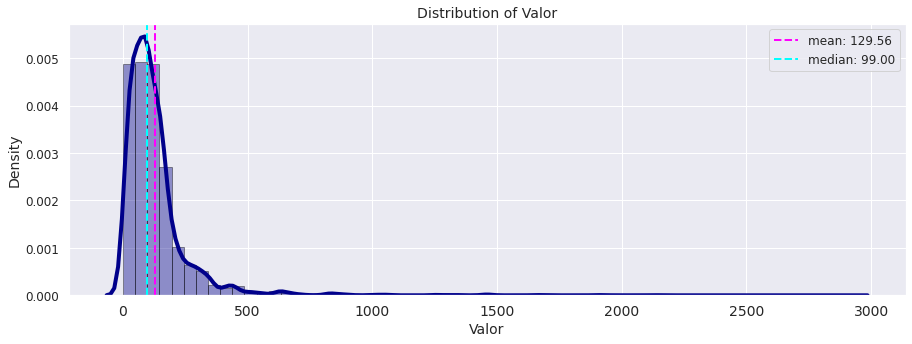

In [16]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(
    df.Valor, hist=True, kde=True, 
    bins=int(180/3), color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 4}
)

ax.axvline(
    df.Valor.mean(), 
    color='magenta', 
    linestyle='dashed', 
    linewidth=2, 
    label="mean: {0:.2f}".format(df.Valor.mean())
)

ax.axvline(
    df.Valor.median(), 
    color='cyan', 
    linestyle='dashed', 
    linewidth=2,
    label="median: {0:.2f}".format(df.Valor.median())
)

plt.title("Distribution of Valor", size=14)
plt.legend(loc='upper right')

del ax

In [72]:
valor = df[['day_of_week', 'day_name','Valor']][df.CBK=='Sim'].groupby(by=['day_of_week', 'day_name'], as_index=False).sum('Valor').copy()
display(valor[['day_name','Valor']])
valor[['day_name','Valor']].describe().T

,day_name,Valor
0,Monday,13011.16
1,Tuesday,10741.52
2,Wednesday,18824.27
3,Thursday,13939.29
4,Friday,18560.15
5,Saturday,23487.47
6,Sunday,6284.00


,count,mean,std,min,25%,50%,75%,max
Valor,7.0,14978.265714,5752.064087,6284.0,11876.34,13939.29,18692.21,23487.47


### Resource: pure_time
* Representa o horário de cada transação em número puro

In [17]:
df[['pure_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
pure_time,11127.0,15.838092,5.183508,0.007222,12.595,16.299444,19.811944,23.995556


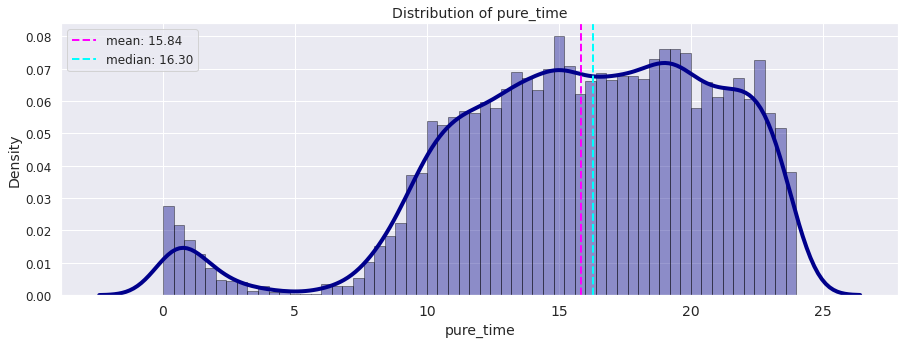

In [18]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(
    df.pure_time, hist=True, kde=True, 
    bins=int(180/3), color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 4}
)

ax.axvline(
    df.pure_time.mean(), 
    color='magenta', 
    linestyle='dashed', 
    linewidth=2, 
    label="mean: {0:.2f}".format(df.pure_time.mean())
)

ax.axvline(
    df.pure_time.median(), 
    color='cyan', 
    linestyle='dashed', 
    linewidth=2,
    label="median: {0:.2f}".format(df.pure_time.median())
)

plt.title("Distribution of pure_time", size=14)
plt.legend(loc='upper left')

del ax

### Resource: day_of_month
* Representa o dia do mês de cada transação

In [19]:
df[['day_of_month']].describe().T

,count,mean,std,min,25%,50%,75%,max
day_of_month,11127.0,16.094275,8.312476,1.0,9.0,15.0,23.0,30.0


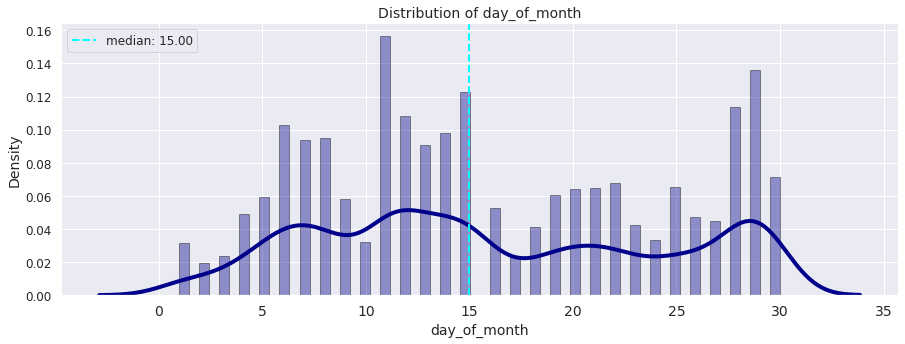

In [20]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(
    df.day_of_month, hist=True, kde=True, 
    bins=int(180/3), color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 4}
)

ax.axvline(
    df.day_of_month.median(), 
    color='cyan', 
    linestyle='dashed', 
    linewidth=2,
    label="median: {0:.2f}".format(df.day_of_month.median())
)

plt.title("Distribution of day_of_month", size=14)
plt.legend(loc='upper left')

del ax

### Resource: day_of_week
* Representa o dia da semana de cada transação

In [21]:
df['day_name'].value_counts(' ') * 100

Friday       21.919655
Thursday     17.884425
Monday       15.071448
Wednesday    14.631078
Tuesday      13.283005
Saturday     11.800126
Sunday        5.410263
Name: day_name, dtype: float64

In [22]:
df[['day_of_week','day_name']].groupby(by=['day_of_week','day_name']).size()

day_of_week  day_name 
0            Monday       1677
1            Tuesday      1478
2            Wednesday    1628
3            Thursday     1990
4            Friday       2439
5            Saturday     1313
6            Sunday        602
dtype: int64

In [23]:
dayFreq = pd.DataFrame({
    'day_name':df[['day_of_week','day_name']].groupby(by=['day_of_week','day_name']).size().index.tolist(),
    'count':df[['day_of_week','day_name']].groupby(by=['day_of_week','day_name']).size().values,
    'freq':df[['day_of_week','day_name']].groupby(by=['day_of_week','day_name']).size().values/df[['day_of_week','day_name']].groupby(by=['day_of_week','day_name']).size().sum()
})

dayFreq

,day_name,count,freq
0,"(0, Monday)",1677,0.150714
1,"(1, Tuesday)",1478,0.132830
2,"(2, Wednesday)",1628,0.146311
3,"(3, Thursday)",1990,0.178844
4,"(4, Friday)",2439,0.219197
5,"(5, Saturday)",1313,0.118001
6,"(6, Sunday)",602,0.054103


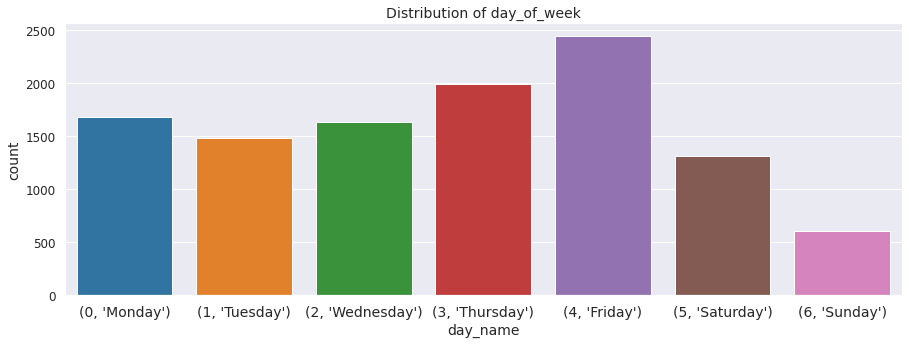

In [24]:
fig = plt.figure(figsize=(15,5))

ax = sns.barplot(
    x = 'day_name',
    y = 'count',
    data = dayFreq
)

plt.title("Distribution of day_of_week",size=14)

del ax

In [71]:
dayFreq = pd.DataFrame({
    'day_name':df[['day_of_week','day_name']][df.CBK=='Sim'].groupby(by=['day_of_week','day_name']).size().index.tolist(),
    'count':df[['day_of_week','day_name']][df.CBK=='Sim'].groupby(by=['day_of_week','day_name']).size().values,
    'freq':df[['day_of_week','day_name']][df.CBK=='Sim'].groupby(by=['day_of_week','day_name']).size().values/df[['day_of_week','day_name']][df.CBK=='Sim'].groupby(by=['day_of_week','day_name']).size().sum()
})

dayFreq

,day_name,count,freq
0,"(0, Monday)",74,0.129371
1,"(1, Tuesday)",69,0.120629
2,"(2, Wednesday)",71,0.124126
3,"(3, Thursday)",99,0.173077
4,"(4, Friday)",130,0.227273
5,"(5, Saturday)",102,0.178322
6,"(6, Sunday)",27,0.047203


### Target Analysis: CBK
* Representa a indicação se houve estorno da transação

In [25]:
df.CBK.value_counts()

Não    10555
Sim      572
Name: CBK, dtype: int64

In [26]:
df.CBK.value_counts(' ') * 100

Não    94.859351
Sim     5.140649
Name: CBK, dtype: float64

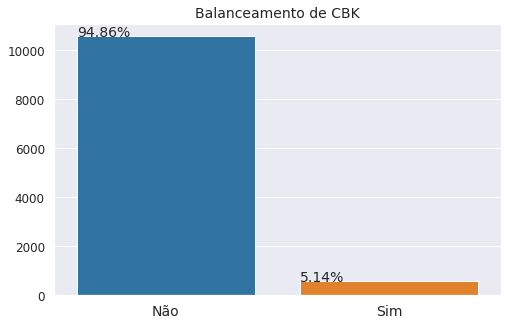

In [27]:
fig = plt.figure(figsize=(8,5))

ax = sns.barplot(
    x = df.CBK.value_counts().index,
    y = df.CBK.value_counts().values
)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/df.CBK.value_counts().values.sum() * 100), (p.get_x(), p.get_height()+0.5), rotation = 0)

plt.title("Balanceamento de CBK", size=14)

del ax

## Bivariate Analysis

### Valor VS target

In [28]:
df[['Valor','CBK']]

,Valor,CBK
0,36.54,Não
1,36.54,Não
2,69.00,Não
3,193.43,Não
4,132.00,Não
...,...,...
11123,53.00,Não
11124,15.00,Não
11125,20.00,Não
11126,70.00,Não


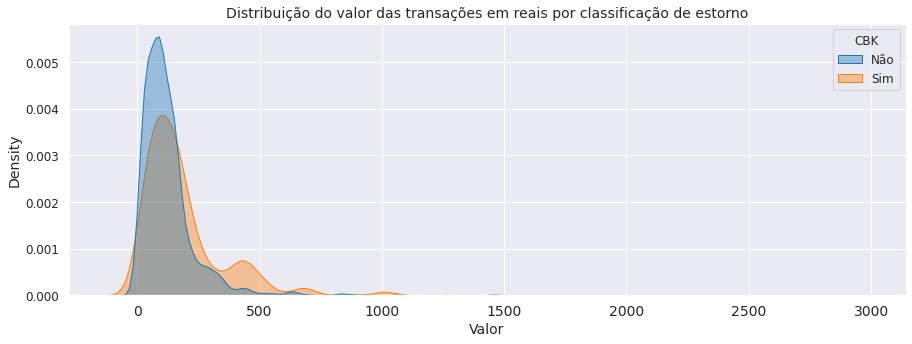

In [29]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x='Valor', hue='CBK', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("Valor")
plt.title('Distribuição do valor das transações em reais por classificação de estorno', size=14)

del ax

**Hypothesis 1:** Transações de maior valor tendem a ter mais estornos que as de menor valor.$\to$ **Accepted**

### day_name VS target

In [30]:
df[['day_name','CBK']]

,day_name,CBK
0,Friday,Não
1,Friday,Não
2,Friday,Não
3,Friday,Não
4,Friday,Não
...,...,...
11123,Saturday,Não
11124,Saturday,Não
11125,Saturday,Não
11126,Saturday,Não


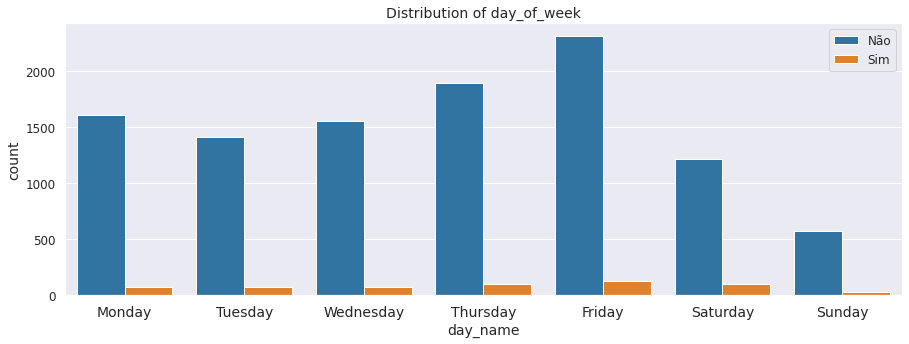

In [31]:
fig = plt.figure(figsize=(15,5))

ax = sns.countplot(
    x = 'day_name',
    hue = 'CBK',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    data = df
)

plt.title("Distribution of day_of_week",size=14)
plt.legend(loc='upper right')

del ax

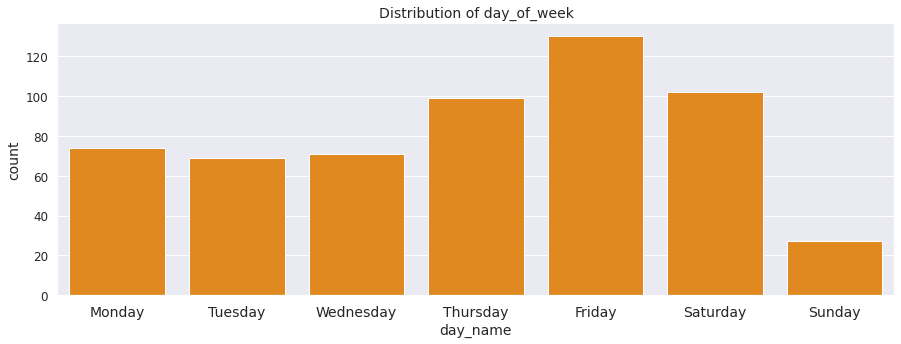

In [32]:
fig = plt.figure(figsize=(15,5))

ax = sns.countplot(
    x = df['day_name'][df['CBK']=='Sim'],
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    color='darkorange'
)

plt.title("Distribution of day_of_week",size=14)

del ax

**Hypothesis 2:** O estorno é influenciado pelo dia da semana em que a transação é feita.$\to$ **Acepted**

### day_of_month VS target

In [33]:
df[['day_of_month','CBK']]

,day_of_month,CBK
0,1,Não
1,1,Não
2,1,Não
3,1,Não
4,1,Não
...,...,...
11123,30,Não
11124,30,Não
11125,30,Não
11126,30,Não


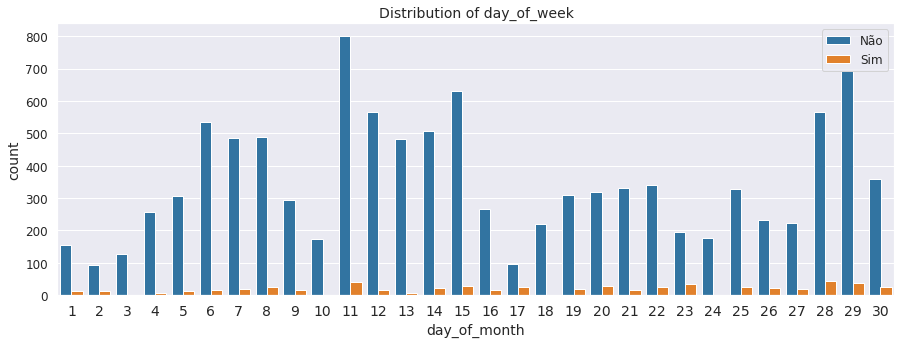

In [34]:
fig = plt.figure(figsize=(15,5))

ax = sns.countplot(
    x = 'day_of_month',
    hue = 'CBK',
    data = df
)

plt.title("Distribution of day_of_week",size=14)
plt.legend(loc='upper right')

del ax

No handles with labels found to put in legend.


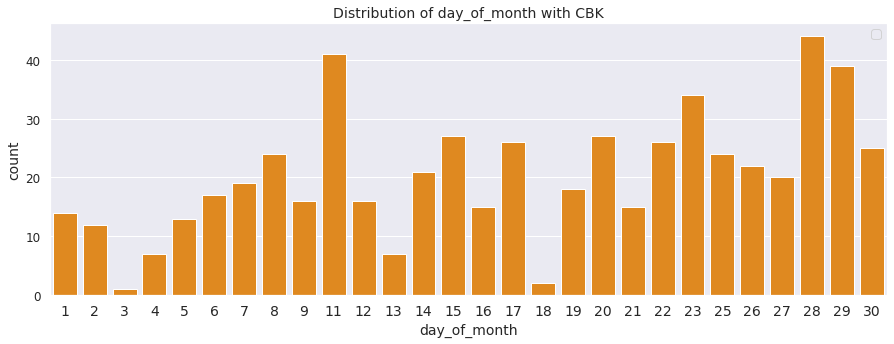

In [35]:
fig = plt.figure(figsize=(15,5))

ax = sns.countplot(
    x = df['day_of_month'][df['CBK']=='Sim'],
    color='darkorange'
)

plt.title("Distribution of day_of_month with CBK",size=14)
plt.legend(loc='upper right')

del ax

**Hypothesis 3:** Transações realizadas em diferentes períodos do mês influenciam no estorno.$\to$ **Acepted**

### pure_time VS target

In [36]:
df[['pure_time','CBK']]

,pure_time,CBK
0,0.031667,Não
1,0.062778,Não
2,0.147222,Não
3,0.450000,Não
4,1.546111,Não
...,...,...
11123,23.116944,Não
11124,23.146389,Não
11125,23.256667,Não
11126,23.294722,Não


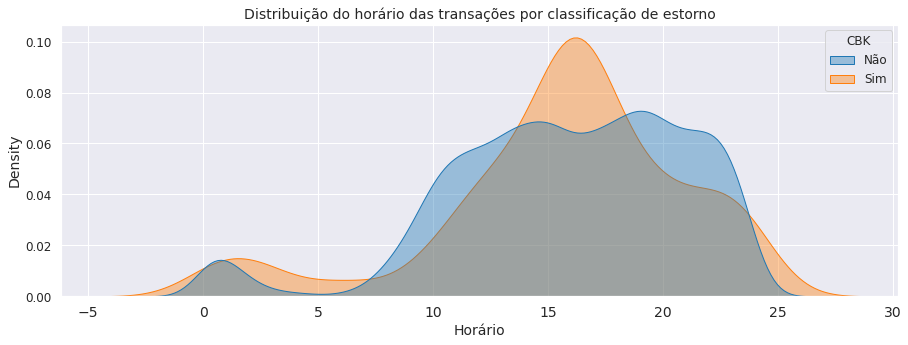

In [37]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x='pure_time', hue='CBK', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("Horário")
plt.title('Distribuição do horário das transações por classificação de estorno', size=14)

del ax

**Hypothesis 4:** O horário em que a transação é realizada influência no estorno.$\to$ **Acepted**

# Hypothesis Conclusion

<br>
<table>
	<thead>
        <tr>
			<th colspan = "4" style="text-align:center;">Levantamento de Hipóteses</th>
		</tr>
		<tr>
			<th>Group</th>
			<th>#</th>
			<th>Hypothesis</th>
            <th>Result</th>
		</tr>
	</thead>
	<tbody>
		<tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Valor <br> da transação<strong></td>
			<td><strong>H1</strong></td>
			<td style="background-color:#dde2ed;">Transações de maior valor tendem a ter mais estornos que as de menor valor.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="2" style="background-color:#dde2ed;"><strong>Dia <br> da transação<strong> </td>
			<td><strong>H2</strong></td>
			<td style="background-color:#dde2ed;">O estorno é influenciado pelo dia da semana em que a transação é feita.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H3</strong></td>
			<td style="background-color:#dde2ed;">Transações realizadas em diferentes períodos do mês influenciam no estorno.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Horário <br> da transação</strong></td>
			<td><strong>H4</strong></td>
			<td style="background-color:#dde2ed;">O horário em que a transação é realizada influência no estorno.</td>
            <td style="background-color:#dde2ed;">Accepted</td>
		</tr> 
    </tbody>
</table>

## Multivariate Analysis

### Valor and pure_time per day_name VS target


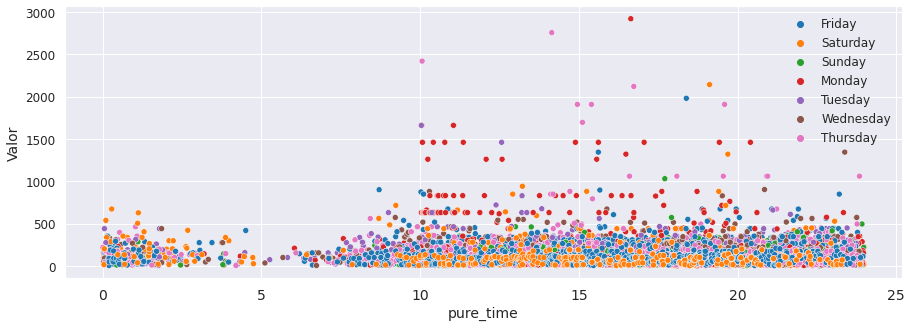

In [38]:
plt.figure(figsize=(15, 5))
ax = sns.scatterplot(x = df.pure_time.loc[df.CBK == 'Não'], y = df.Valor.loc[df.CBK == 'Não'], hue = 'day_name', data=df)
plt.legend()
leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)

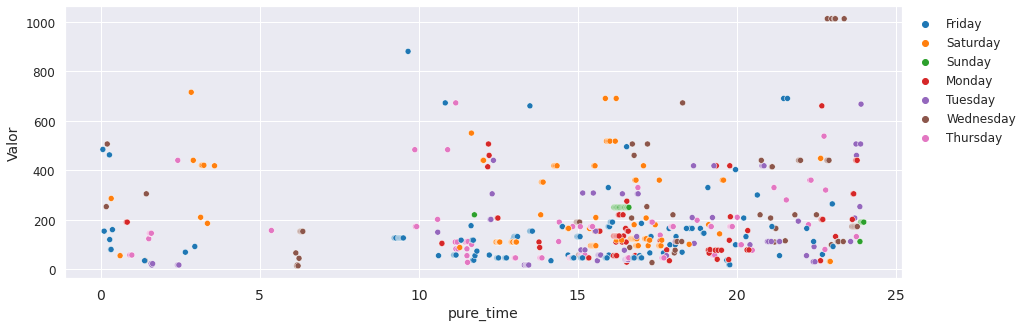

In [39]:
plt.figure(figsize=(15, 5))
ax = sns.scatterplot(x = df.pure_time.loc[df.CBK == 'Sim'], y = df.Valor.loc[df.CBK == 'Sim'], hue = 'day_name', data=df)
plt.legend()
leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)

### Valor and pure_time per day_of_month VS target

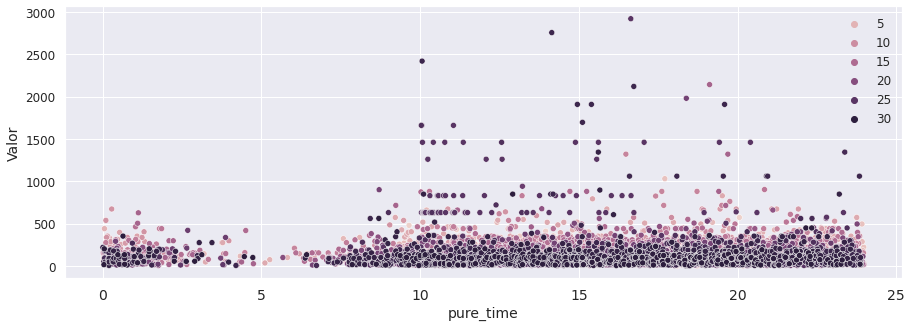

In [40]:
plt.figure(figsize=(15, 5))
ax = sns.scatterplot(x = df.pure_time.loc[df.CBK == 'Não'], y = df.Valor.loc[df.CBK == 'Não'], hue = 'day_of_month', data=df)
plt.legend()
leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)

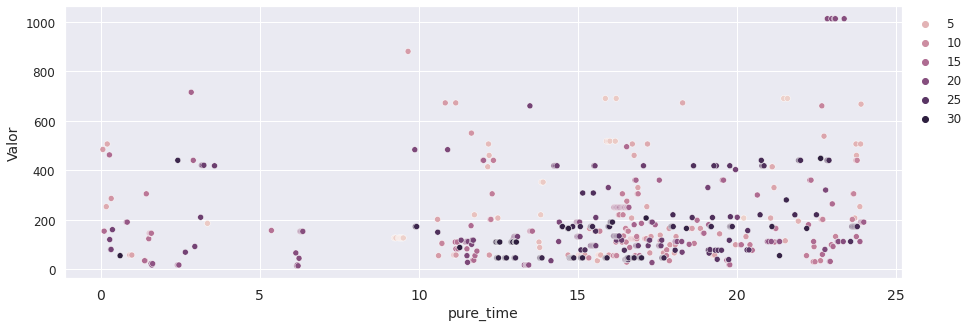

In [41]:
plt.figure(figsize=(15, 5))
ax = sns.scatterplot(x = df.pure_time.loc[df.CBK == 'Sim'], y = df.Valor.loc[df.CBK == 'Sim'], hue = 'day_of_month', data=df)
plt.legend()
leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)

In [42]:
conditions = [
    (df.day_of_month <= 5),
    ((df.day_of_month > 5) & (df.day_of_month <= 10)),
    ((df.day_of_month > 10) & (df.day_of_month <= 15)),
    ((df.day_of_month > 15) & (df.day_of_month <= 20)),
    ((df.day_of_month > 20) & (df.day_of_month <= 25)),
    (df.day_of_month > 25),
]

choices = ['1-5', '6-10', '11-15', '16-20', '21-25', '>25']

df['day_of_month_RANGE'] = np.select(conditions, choices, default='Tie')

del conditions

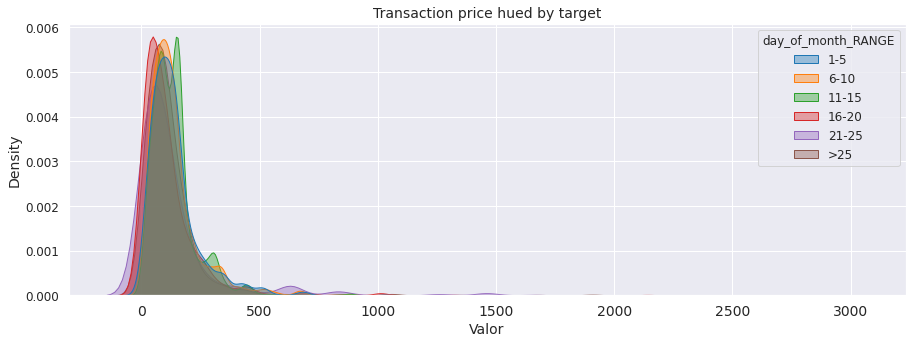

In [43]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x='Valor', hue='day_of_month_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("Valor")
plt.title('Transaction price hued by target', size=14)

del ax

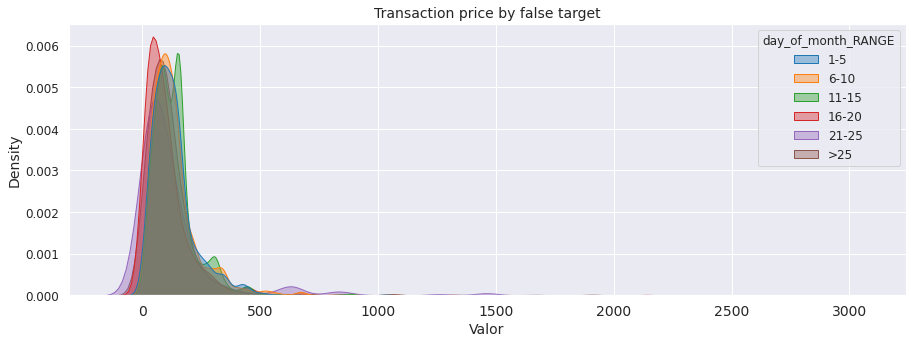

In [44]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['Valor'][df.CBK=='Não'], hue='day_of_month_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("Valor")
plt.title('Transaction price by false target', size=14)

del ax

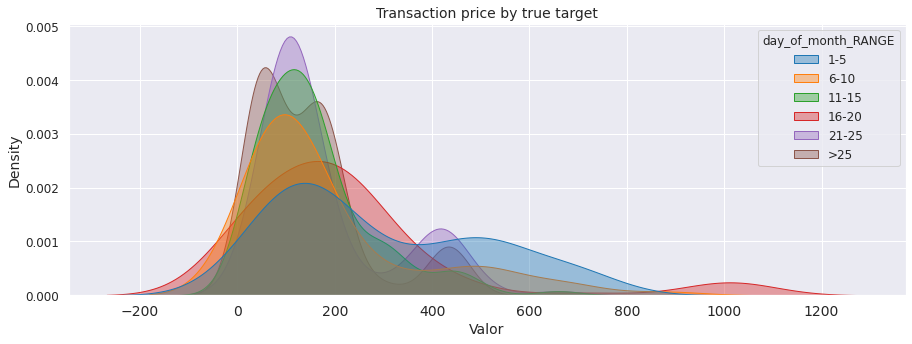

In [45]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['Valor'][df.CBK=='Sim'], hue='day_of_month_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("Valor")
plt.title('Transaction price by true target', size=14)

del ax

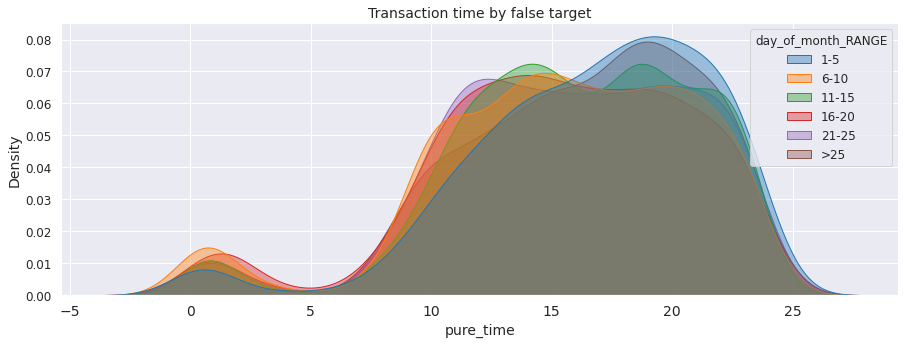

In [46]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['pure_time'][df.CBK=='Não'], hue='day_of_month_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("pure_time")
plt.title('Transaction time by false target', size=14)

del ax

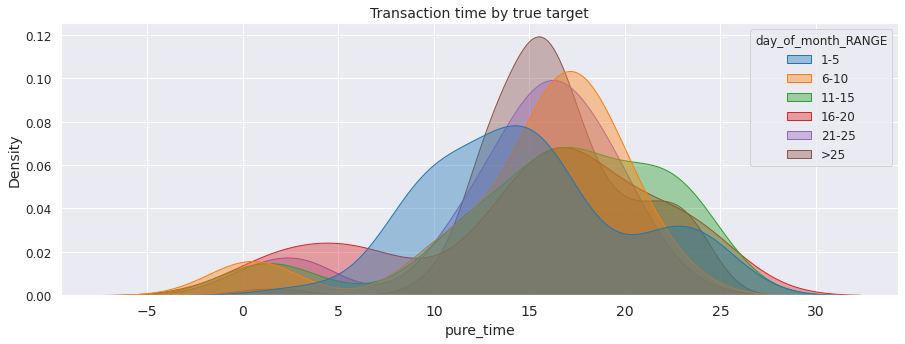

In [47]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['pure_time'][df.CBK=='Sim'], hue='day_of_month_RANGE', fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("pure_time")
plt.title('Transaction time by true target', size=14)

del ax

# Análise Comportamental
* Recorrência de transação diária por Cartão
* Recorrência de transação diária de mesmo Valor por Cartão
* Merge
* Tempo entre transações do mesmo Cartão num mesmo dia
* Ticket Médio
    * Convertido
    * Não convertido
* Perguntas
    * Qual é o comportamento transacional do cliente (o que caracteriza as transações deste cliente)?
    * Qual é o perfil das transações que retornaram chargeback?

In [48]:
df

,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE
0,536518******2108,2015-05-01,00:01:54,36.54,4,Friday,1,0.031667,Não,1-5
1,536518******2108,2015-05-01,00:03:46,36.54,4,Friday,1,0.062778,Não,1-5
2,453211******1239,2015-05-01,00:08:50,69.00,4,Friday,1,0.147222,Não,1-5
3,548827******1705,2015-05-01,00:27:00,193.43,4,Friday,1,0.450000,Não,1-5
4,531681******9778,2015-05-01,01:32:46,132.00,4,Friday,1,1.546111,Não,1-5
...,...,...,...,...,...,...,...,...,...,...
11123,514868******7409,2015-05-30,23:07:01,53.00,5,Saturday,30,23.116944,Não,>25
11124,439354******5281,2015-05-30,23:08:47,15.00,5,Saturday,30,23.146389,Não,>25
11125,549167******1648,2015-05-30,23:15:24,20.00,5,Saturday,30,23.256667,Não,>25
11126,518759******8384,2015-05-30,23:17:41,70.00,5,Saturday,30,23.294722,Não,>25


In [49]:
df[df.CBK=='Não']

,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE
0,536518******2108,2015-05-01,00:01:54,36.54,4,Friday,1,0.031667,Não,1-5
1,536518******2108,2015-05-01,00:03:46,36.54,4,Friday,1,0.062778,Não,1-5
2,453211******1239,2015-05-01,00:08:50,69.00,4,Friday,1,0.147222,Não,1-5
3,548827******1705,2015-05-01,00:27:00,193.43,4,Friday,1,0.450000,Não,1-5
4,531681******9778,2015-05-01,01:32:46,132.00,4,Friday,1,1.546111,Não,1-5
...,...,...,...,...,...,...,...,...,...,...
11123,514868******7409,2015-05-30,23:07:01,53.00,5,Saturday,30,23.116944,Não,>25
11124,439354******5281,2015-05-30,23:08:47,15.00,5,Saturday,30,23.146389,Não,>25
11125,549167******1648,2015-05-30,23:15:24,20.00,5,Saturday,30,23.256667,Não,>25
11126,518759******8384,2015-05-30,23:17:41,70.00,5,Saturday,30,23.294722,Não,>25


In [50]:
df[df.CBK=='Sim']

,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE
8,554906******0358,2015-05-01,09:13:51,126.5,4,Friday,1,9.230833,Sim,1-5
9,554906******0358,2015-05-01,09:15:28,126.5,4,Friday,1,9.257778,Sim,1-5
10,554906******0358,2015-05-01,09:16:52,126.5,4,Friday,1,9.281111,Sim,1-5
11,498406******6424,2015-05-01,09:21:35,126.5,4,Friday,1,9.359722,Sim,1-5
12,498406******6424,2015-05-01,09:23:02,126.5,4,Friday,1,9.383889,Sim,1-5
...,...,...,...,...,...,...,...,...,...,...
10994,539614******3442,2015-05-30,22:38:19,448.0,5,Saturday,30,22.638611,Sim,>25
11010,401370******9822,2015-05-30,14:41:22,165.0,5,Saturday,30,14.689444,Sim,>25
11011,401370******9822,2015-05-30,14:42:40,165.0,5,Saturday,30,14.711111,Sim,>25
11048,527496******9442,2015-05-30,17:09:01,207.0,5,Saturday,30,17.150278,Sim,>25


## Recorrência de transação diária por Cartão

In [51]:
df_sameDay = df[['Cartão','Dia']].value_counts().to_frame().reset_index()
df_sameDay.rename(columns={0:'same_day_count'}, inplace=True)
df_sameDay

,Cartão,Dia,same_day_count
0,552289******7788,2015-05-17,20
1,400217******7228,2015-05-11,12
2,521397******2711,2015-05-29,11
3,498408******0601,2015-05-20,10
4,403246******0294,2015-05-09,9
...,...,...,...
10122,470598******6272,2015-05-24,1
10123,470598******6301,2015-05-01,1
10124,470598******6301,2015-05-19,1
10125,470598******6359,2015-05-29,1


## Recorrência de transação diária de mesmo Valor por Cartão

In [52]:
df_sameDayValor = df[['Cartão','Dia','Valor']].value_counts().to_frame().reset_index()
df_sameDayValor.rename(columns={0:'same_day_valor_count'}, inplace=True)
df_sameDayValor

,Cartão,Dia,Valor,same_day_valor_count
0,552289******7788,2015-05-17,250.00,20
1,403246******0294,2015-05-09,123.20,9
2,521397******2711,2015-05-30,110.00,9
3,400770******2516,2015-05-19,17.24,8
4,544828******8377,2015-05-25,134.40,8
...,...,...,...,...
10443,470598******1238,2015-05-02,143.00,1
10444,470598******1264,2015-05-13,154.00,1
10445,470598******1313,2015-05-15,132.00,1
10446,470598******1507,2015-05-18,132.00,1


## Merge

In [53]:
dfa = df.merge(df_sameDay[['Cartão','Dia','same_day_count']], how='left', left_on = ['Cartão','Dia'], right_on = ['Cartão','Dia'])
print(dfa.shape)
dfa

(11127, 11)


,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE,same_day_count
0,536518******2108,2015-05-01,00:01:54,36.54,4,Friday,1,0.031667,Não,1-5,2
1,536518******2108,2015-05-01,00:03:46,36.54,4,Friday,1,0.062778,Não,1-5,2
2,453211******1239,2015-05-01,00:08:50,69.00,4,Friday,1,0.147222,Não,1-5,1
3,548827******1705,2015-05-01,00:27:00,193.43,4,Friday,1,0.450000,Não,1-5,1
4,531681******9778,2015-05-01,01:32:46,132.00,4,Friday,1,1.546111,Não,1-5,1
...,...,...,...,...,...,...,...,...,...,...,...
11122,514868******7409,2015-05-30,23:07:01,53.00,5,Saturday,30,23.116944,Não,>25,2
11123,439354******5281,2015-05-30,23:08:47,15.00,5,Saturday,30,23.146389,Não,>25,2
11124,549167******1648,2015-05-30,23:15:24,20.00,5,Saturday,30,23.256667,Não,>25,2
11125,518759******8384,2015-05-30,23:17:41,70.00,5,Saturday,30,23.294722,Não,>25,2


In [54]:
dfb = dfa.merge(df_sameDayValor[['Cartão','Dia','Valor','same_day_valor_count']], how='left', left_on = ['Cartão','Dia','Valor'], right_on = ['Cartão','Dia','Valor'])
print(dfb.shape)
dfb

(11127, 12)


,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE,same_day_count,same_day_valor_count
0,536518******2108,2015-05-01,00:01:54,36.54,4,Friday,1,0.031667,Não,1-5,2,2
1,536518******2108,2015-05-01,00:03:46,36.54,4,Friday,1,0.062778,Não,1-5,2,2
2,453211******1239,2015-05-01,00:08:50,69.00,4,Friday,1,0.147222,Não,1-5,1,1
3,548827******1705,2015-05-01,00:27:00,193.43,4,Friday,1,0.450000,Não,1-5,1,1
4,531681******9778,2015-05-01,01:32:46,132.00,4,Friday,1,1.546111,Não,1-5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,514868******7409,2015-05-30,23:07:01,53.00,5,Saturday,30,23.116944,Não,>25,2,2
11123,439354******5281,2015-05-30,23:08:47,15.00,5,Saturday,30,23.146389,Não,>25,2,2
11124,549167******1648,2015-05-30,23:15:24,20.00,5,Saturday,30,23.256667,Não,>25,2,2
11125,518759******8384,2015-05-30,23:17:41,70.00,5,Saturday,30,23.294722,Não,>25,2,2


In [55]:
df = dfb.copy()
df = df.sort_values(by=['Cartão','Dia','Hora']).reset_index(drop=True).copy()
df

,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE,same_day_count,same_day_valor_count
0,400217******1137,2015-05-06,09:37:46,198.0,2,Wednesday,6,9.629444,Não,6-10,1,1
1,400217******1353,2015-05-27,23:37:20,172.5,2,Wednesday,27,23.622222,Sim,>25,8,8
2,400217******1353,2015-05-27,23:38:58,172.5,2,Wednesday,27,23.649444,Sim,>25,8,8
3,400217******1353,2015-05-27,23:40:15,172.5,2,Wednesday,27,23.670833,Sim,>25,8,8
4,400217******1353,2015-05-27,23:41:38,172.5,2,Wednesday,27,23.693889,Sim,>25,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,554932******8129,2015-05-20,22:52:46,112.0,2,Wednesday,20,22.879444,Não,16-20,5,4
11123,554932******8129,2015-05-20,23:04:29,134.4,2,Wednesday,20,23.074722,Não,16-20,5,1
11124,554932******8142,2015-05-06,18:15:53,207.0,2,Wednesday,6,18.264722,Não,6-10,1,1
11125,554932******9115,2015-05-28,15:31:22,138.0,3,Thursday,28,15.522778,Não,>25,1,1


In [56]:
df['rank_same_day'] = df.groupby(by=['Cartão','Dia'])['pure_time'].rank(method='first')
df

,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE,same_day_count,same_day_valor_count,rank_same_day
0,400217******1137,2015-05-06,09:37:46,198.0,2,Wednesday,6,9.629444,Não,6-10,1,1,1.0
1,400217******1353,2015-05-27,23:37:20,172.5,2,Wednesday,27,23.622222,Sim,>25,8,8,1.0
2,400217******1353,2015-05-27,23:38:58,172.5,2,Wednesday,27,23.649444,Sim,>25,8,8,2.0
3,400217******1353,2015-05-27,23:40:15,172.5,2,Wednesday,27,23.670833,Sim,>25,8,8,3.0
4,400217******1353,2015-05-27,23:41:38,172.5,2,Wednesday,27,23.693889,Sim,>25,8,8,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,554932******8129,2015-05-20,22:52:46,112.0,2,Wednesday,20,22.879444,Não,16-20,5,4,4.0
11123,554932******8129,2015-05-20,23:04:29,134.4,2,Wednesday,20,23.074722,Não,16-20,5,1,5.0
11124,554932******8142,2015-05-06,18:15:53,207.0,2,Wednesday,6,18.264722,Não,6-10,1,1,1.0
11125,554932******9115,2015-05-28,15:31:22,138.0,3,Thursday,28,15.522778,Não,>25,1,1,1.0


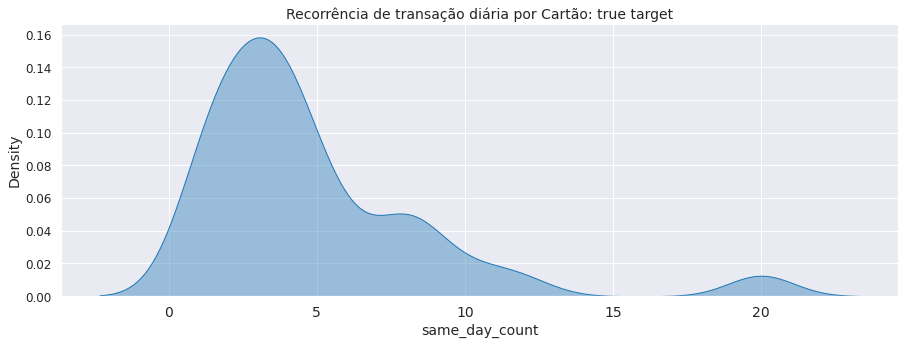

In [57]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['same_day_count'][df.CBK=='Sim'], fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("same_day_count")
plt.title('Recorrência de transação diária por Cartão: true target', size=14)

del ax

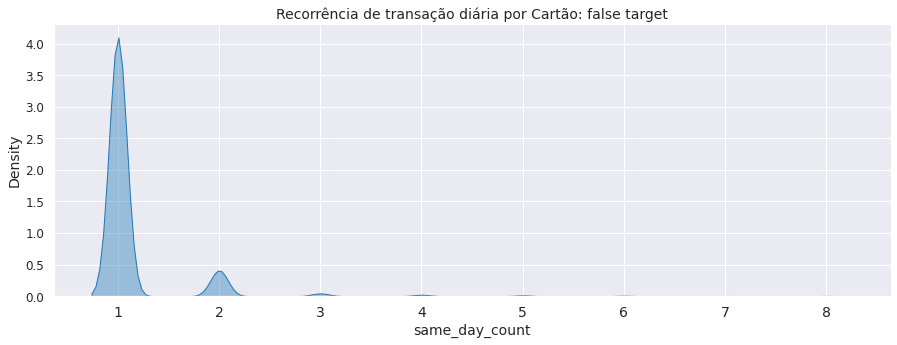

In [58]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['same_day_count'][df.CBK=='Não'], fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("same_day_count")
plt.title('Recorrência de transação diária por Cartão: false target', size=14)

del ax

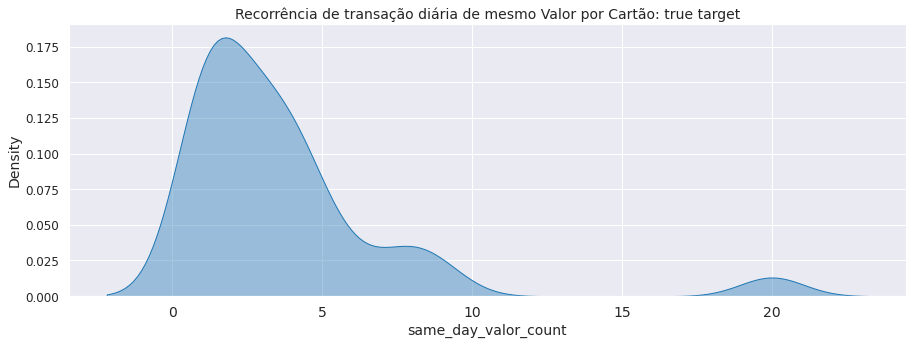

In [59]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['same_day_valor_count'][df.CBK=='Sim'], fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("same_day_valor_count")
plt.title('Recorrência de transação diária de mesmo Valor por Cartão: true target', size=14)

del ax

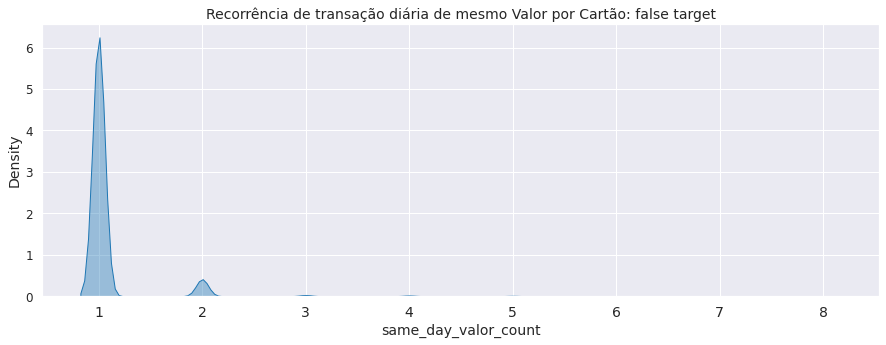

In [60]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['same_day_valor_count'][df.CBK=='Não'], fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("same_day_valor_count")
plt.title('Recorrência de transação diária de mesmo Valor por Cartão: false target', size=14)

del ax

## Tempo entre transações do mesmo Cartão num mesmo dia

In [61]:
diff_time = []
for i in range(len(df)):
    if df.rank_same_day[i] == 1:
        diff_time.append(0)
    else:
        diff_time.append(df.pure_time[i] - df.pure_time[i-1])
df['diff_time'] = diff_time
df

,Cartão,Dia,Hora,Valor,day_of_week,day_name,day_of_month,pure_time,CBK,day_of_month_RANGE,same_day_count,same_day_valor_count,rank_same_day,diff_time
0,400217******1137,2015-05-06,09:37:46,198.0,2,Wednesday,6,9.629444,Não,6-10,1,1,1.0,0.000000
1,400217******1353,2015-05-27,23:37:20,172.5,2,Wednesday,27,23.622222,Sim,>25,8,8,1.0,0.000000
2,400217******1353,2015-05-27,23:38:58,172.5,2,Wednesday,27,23.649444,Sim,>25,8,8,2.0,0.027222
3,400217******1353,2015-05-27,23:40:15,172.5,2,Wednesday,27,23.670833,Sim,>25,8,8,3.0,0.021389
4,400217******1353,2015-05-27,23:41:38,172.5,2,Wednesday,27,23.693889,Sim,>25,8,8,4.0,0.023056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,554932******8129,2015-05-20,22:52:46,112.0,2,Wednesday,20,22.879444,Não,16-20,5,4,4.0,0.022222
11123,554932******8129,2015-05-20,23:04:29,134.4,2,Wednesday,20,23.074722,Não,16-20,5,1,5.0,0.195278
11124,554932******8142,2015-05-06,18:15:53,207.0,2,Wednesday,6,18.264722,Não,6-10,1,1,1.0,0.000000
11125,554932******9115,2015-05-28,15:31:22,138.0,3,Thursday,28,15.522778,Não,>25,1,1,1.0,0.000000


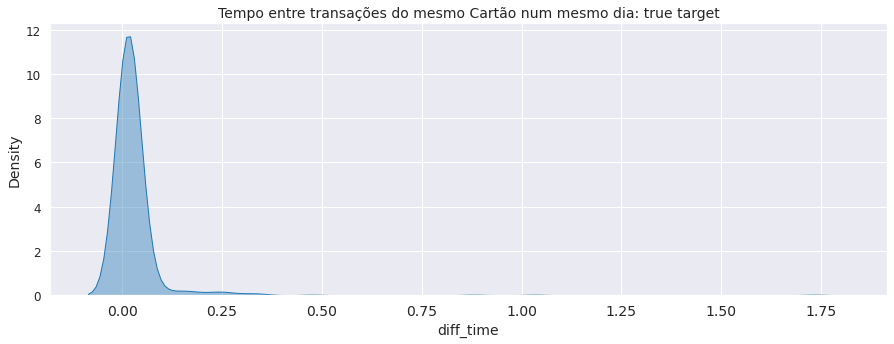

In [62]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['diff_time'][df.CBK=='Sim'], fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("diff_time")
plt.title('Tempo entre transações do mesmo Cartão num mesmo dia: true target', size=14)

del ax

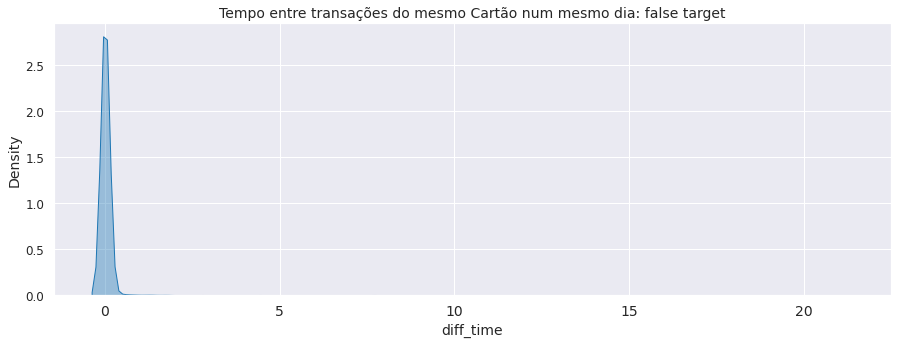

In [63]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x=df['diff_time'][df.CBK=='Não'], fill=True, common_norm=False, alpha=0.4, legend=True)
plt.xlabel("diff_time")
plt.title('Tempo entre transações do mesmo Cartão num mesmo dia: false target', size=14)

del ax

## Ticket Médio

### Convertido

In [64]:
df[df.CBK=='Não']['Valor'].sum()

1336762.3900000001

In [65]:
len(df[df.CBK=='Não'])

10555

In [66]:
round(df[df.CBK=='Não']['Valor'].sum()/len(df[df.CBK=='Não']), 2)

126.65

### Não convertido

In [67]:
df[df.CBK=='Sim']['Valor'].sum()

104847.86

In [68]:
len(df[df.CBK=='Sim'])

572

In [69]:
round(df[df.CBK=='Sim']['Valor'].sum()/len(df[df.CBK=='Sim']), 2)

183.3

### Qual é o comportamento transacional do cliente (o que caracteriza as transações deste cliente)?

### Qual é o perfil das transações que retornaram chargeback?